In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)
print(mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print(mnist.train.images.shape, mnist.train.labels.shape)

((55000, 784), (55000, 10))


In [4]:
print(np.min(mnist.train.images),np.max(mnist.train.images))

(0.0, 1.0)


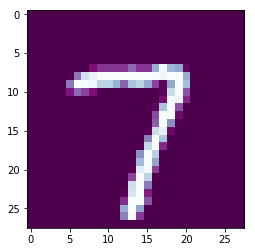

In [8]:
plt.imshow(np.reshape(mnist.train.images[100,:], (28,28)),cmap='BuPu_r')

In [9]:
n_input=784
n_output=10


In [10]:
W=tf.Variable(tf.zeros([n_input,n_output]))
B=tf.Variable(tf.zeros([n_output]))
net_output=tf.nn.softmax(tf.matmul(net_input,W)+B)


In [13]:
y_true=tf.placeholder(tf.float32,[None,10])
cross_entropy=-tf.reduce_sum(y_true*tf.log(net_output))
correct_prediction=tf.equal(tf.argmax(n_output, 1),tf.argmax(y_true, 1))


In [15]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))

In [16]:
optimizer=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [17]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [23]:
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
  #  print(sess.run(accuracy,
   #                feed_dict={
    #                   net_input: mnist.validation.images,
     #                  y_true: mnist.validation.labels
#}))
        
        

In [25]:
#print(sess.run(accuracy, feed_dict={net_input: mnist.test.images, y_true: mnist.test.labels}))